In [18]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [19]:
# importation des données

df = pd.read_csv("data/Traffic_Crashes_-_Crashes (1).csv")

In [20]:
# Affichage des premières lignes du DataFrame
df

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,000c4307d8e9b39075cffdd0aade3603e0f96f14e41da9...,NaN,01/14/2025 12:25:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,2.0,0.0,12,3,1,41.997808,-87.655770,POINT (-87.655770494712 41.997807727633)
1,027b0b4c21460d3441fd83929abb9673c6fc0c7d575675...,NaN,05/23/2025 09:30:00 AM,30,STOP SIGN/FLASHER,UNKNOWN,UNKNOWN,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,2.0,0.0,9,6,5,41.946529,-87.688106,POINT (-87.688106391039 41.946529480518)
2,04d91dffc94f677358ca47056921ba5c4224320df27ed4...,Y,04/05/2025 08:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,1.0,0.0,20,7,4,41.899325,-87.715074,POINT (-87.715074373867 41.899324573751)
3,0b5603954d84b7341c7cad4f570ea039e85919f3750ccb...,NaN,05/23/2025 09:15:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,2.0,0.0,9,6,5,41.902793,-87.699412,POINT (-87.699412181285 41.902792968177)
4,00bce77960c2faa2a8782a8cac1d6e5715802d6c072a08...,NaN,01/14/2025 08:00:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,DAYLIGHT,REAR END,FOUR WAY,...,0.0,0.0,2.0,0.0,8,3,1,41.691207,-87.720555,POINT (-87.720554863466 41.691206664451)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963115,01ea9d48390e03a768e6184d6db0d84ebe7f8d689510e2...,NaN,07/08/2025 03:54:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,1.0,0.0,15,3,7,41.870734,-87.686299,POINT (-87.686299270241 41.870733948431)
963116,8f5ef349d963d9004dd2468d095928258ed5e5b77a9de9...,NaN,07/08/2025 04:15:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,1.0,0.0,4,3,7,41.951199,-87.654594,POINT (-87.654593806796 41.951199478068)
963117,5823f0da83859ad572c3baf4175849018fca4cc5c6213d...,NaN,07/08/2025 01:15:00 PM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,...,0.0,0.0,3.0,0.0,13,3,7,41.965649,-87.640909,POINT (-87.640908691934 41.96564920418)
963118,8b20e8f409e6f8033f00d4c2047b4824ccbee3726130ec...,NaN,07/08/2025 08:57:00 PM,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,3.0,0.0,20,3,7,41.999652,-87.689995,POINT (-87.689995398698 41.999652318203)


In [21]:
# Dimension du dataset 
df.shape

(963120, 48)

In [22]:
df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

# Nettoyage des données

<Axes: title={'center': 'Taux de valeurs manquantes'}>

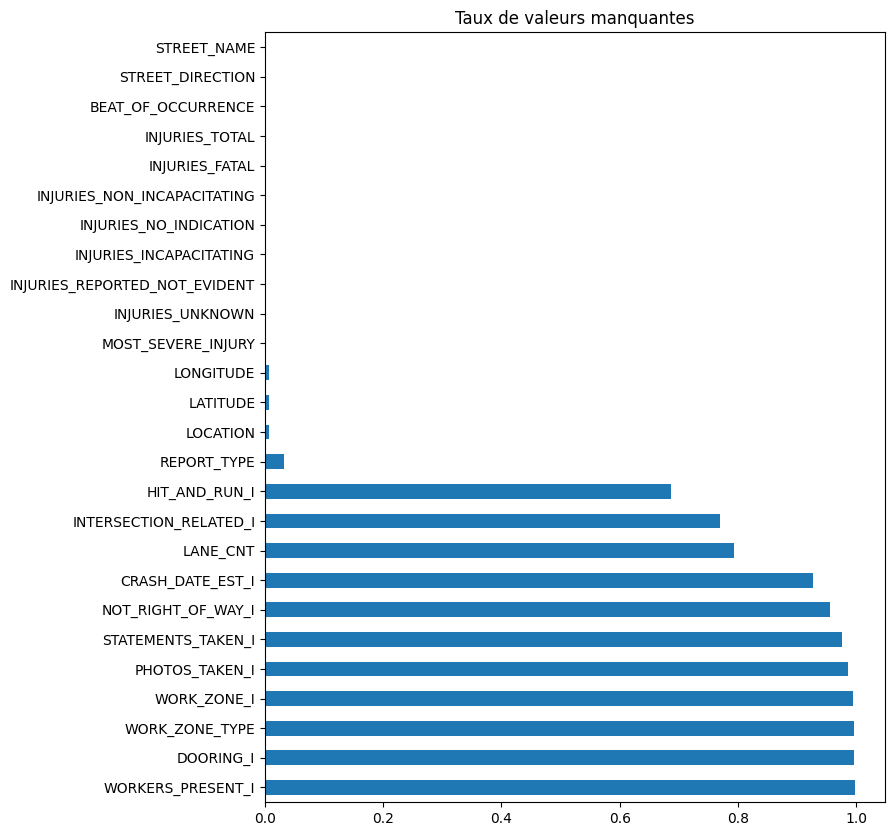

In [23]:
missing = df.isnull().mean().sort_values(ascending=False)
missing[missing > 0].plot(kind='barh', figsize=(8, 10), title="Taux de valeurs manquantes")

Nous allons concerver les colonnes qui ont moins de 1% de valeur manquante

In [24]:
missing[missing > 0]

WORKERS_PRESENT_I                0.998597
DOORING_I                        0.996856
WORK_ZONE_TYPE                   0.995813
WORK_ZONE_I                      0.994540
PHOTOS_TAKEN_I                   0.985997
STATEMENTS_TAKEN_I               0.976533
NOT_RIGHT_OF_WAY_I               0.954832
CRASH_DATE_EST_I                 0.926911
LANE_CNT                         0.793352
INTERSECTION_RELATED_I           0.770131
HIT_AND_RUN_I                    0.686289
REPORT_TYPE                      0.032311
LOCATION                         0.007464
LATITUDE                         0.007464
LONGITUDE                        0.007464
MOST_SEVERE_INJURY               0.002198
INJURIES_UNKNOWN                 0.002184
INJURIES_REPORTED_NOT_EVIDENT    0.002184
INJURIES_INCAPACITATING          0.002184
INJURIES_NO_INDICATION           0.002184
INJURIES_NON_INCAPACITATING      0.002184
INJURIES_FATAL                   0.002184
INJURIES_TOTAL                   0.002184
BEAT_OF_OCCURRENCE               0

In [25]:
df_clean=df.loc[:, missing < 0.01]
df_clean

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,000c4307d8e9b39075cffdd0aade3603e0f96f14e41da9...,01/14/2025 12:25:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,0.0,2.0,0.0,12,3,1,41.997808,-87.655770,POINT (-87.655770494712 41.997807727633)
1,027b0b4c21460d3441fd83929abb9673c6fc0c7d575675...,05/23/2025 09:30:00 AM,30,STOP SIGN/FLASHER,UNKNOWN,UNKNOWN,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,0.0,2.0,0.0,9,6,5,41.946529,-87.688106,POINT (-87.688106391039 41.946529480518)
2,04d91dffc94f677358ca47056921ba5c4224320df27ed4...,04/05/2025 08:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,1.0,0.0,20,7,4,41.899325,-87.715074,POINT (-87.715074373867 41.899324573751)
3,0b5603954d84b7341c7cad4f570ea039e85919f3750ccb...,05/23/2025 09:15:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,...,1.0,0.0,2.0,0.0,9,6,5,41.902793,-87.699412,POINT (-87.699412181285 41.902792968177)
4,00bce77960c2faa2a8782a8cac1d6e5715802d6c072a08...,01/14/2025 08:00:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,...,0.0,0.0,2.0,0.0,8,3,1,41.691207,-87.720555,POINT (-87.720554863466 41.691206664451)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963115,01ea9d48390e03a768e6184d6db0d84ebe7f8d689510e2...,07/08/2025 03:54:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,...,0.0,0.0,1.0,0.0,15,3,7,41.870734,-87.686299,POINT (-87.686299270241 41.870733948431)
963116,8f5ef349d963d9004dd2468d095928258ed5e5b77a9de9...,07/08/2025 04:15:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,1.0,0.0,4,3,7,41.951199,-87.654594,POINT (-87.654593806796 41.951199478068)
963117,5823f0da83859ad572c3baf4175849018fca4cc5c6213d...,07/08/2025 01:15:00 PM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,3.0,0.0,13,3,7,41.965649,-87.640909,POINT (-87.640908691934 41.96564920418)
963118,8b20e8f409e6f8033f00d4c2047b4824ccbee3726130ec...,07/08/2025 08:57:00 PM,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,0.0,3.0,0.0,20,3,7,41.999652,-87.689995,POINT (-87.689995398698 41.999652318203)


# Supprimer les valeurs manquantes de la colonne LATITUDE

In [26]:
df_clean= df_clean.dropna(subset=['LATITUDE'])
df_clean

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,000c4307d8e9b39075cffdd0aade3603e0f96f14e41da9...,01/14/2025 12:25:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,0.0,2.0,0.0,12,3,1,41.997808,-87.655770,POINT (-87.655770494712 41.997807727633)
1,027b0b4c21460d3441fd83929abb9673c6fc0c7d575675...,05/23/2025 09:30:00 AM,30,STOP SIGN/FLASHER,UNKNOWN,UNKNOWN,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,0.0,2.0,0.0,9,6,5,41.946529,-87.688106,POINT (-87.688106391039 41.946529480518)
2,04d91dffc94f677358ca47056921ba5c4224320df27ed4...,04/05/2025 08:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,1.0,0.0,20,7,4,41.899325,-87.715074,POINT (-87.715074373867 41.899324573751)
3,0b5603954d84b7341c7cad4f570ea039e85919f3750ccb...,05/23/2025 09:15:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,...,1.0,0.0,2.0,0.0,9,6,5,41.902793,-87.699412,POINT (-87.699412181285 41.902792968177)
4,00bce77960c2faa2a8782a8cac1d6e5715802d6c072a08...,01/14/2025 08:00:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,...,0.0,0.0,2.0,0.0,8,3,1,41.691207,-87.720555,POINT (-87.720554863466 41.691206664451)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963115,01ea9d48390e03a768e6184d6db0d84ebe7f8d689510e2...,07/08/2025 03:54:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,...,0.0,0.0,1.0,0.0,15,3,7,41.870734,-87.686299,POINT (-87.686299270241 41.870733948431)
963116,8f5ef349d963d9004dd2468d095928258ed5e5b77a9de9...,07/08/2025 04:15:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,1.0,0.0,4,3,7,41.951199,-87.654594,POINT (-87.654593806796 41.951199478068)
963117,5823f0da83859ad572c3baf4175849018fca4cc5c6213d...,07/08/2025 01:15:00 PM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,3.0,0.0,13,3,7,41.965649,-87.640909,POINT (-87.640908691934 41.96564920418)
963118,8b20e8f409e6f8033f00d4c2047b4824ccbee3726130ec...,07/08/2025 08:57:00 PM,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,0.0,3.0,0.0,20,3,7,41.999652,-87.689995,POINT (-87.689995398698 41.999652318203)


In [27]:
# supprimer les colonnes qui ne sont pas utiles
df_clean = df_clean.drop(columns=['CRASH_RECORD_ID','LOCATION'])
df_clean

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
0,01/14/2025 12:25:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,SNOW OR SLUSH,...,0.0,0.0,0.0,2.0,0.0,12,3,1,41.997808,-87.655770
1,05/23/2025 09:30:00 AM,30,STOP SIGN/FLASHER,UNKNOWN,UNKNOWN,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,UNKNOWN,...,0.0,0.0,0.0,2.0,0.0,9,6,5,41.946529,-87.688106
2,04/05/2025 08:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,0.0,1.0,0.0,20,7,4,41.899325,-87.715074
3,05/23/2025 09:15:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,1.0,0.0,2.0,0.0,9,6,5,41.902793,-87.699412
4,01/14/2025 08:00:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,WET,...,0.0,0.0,0.0,2.0,0.0,8,3,1,41.691207,-87.720555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963115,07/08/2025 03:54:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,0.0,1.0,0.0,15,3,7,41.870734,-87.686299
963116,07/08/2025 04:15:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,0.0,1.0,0.0,4,3,7,41.951199,-87.654594
963117,07/08/2025 01:15:00 PM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,0.0,3.0,0.0,13,3,7,41.965649,-87.640909
963118,07/08/2025 08:57:00 PM,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,WET,...,0.0,0.0,0.0,3.0,0.0,20,3,7,41.999652,-87.689995


In [28]:
num_cols = df_clean.select_dtypes(include=['number']).columns
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns

In [29]:
# Remplacer les NaN par la médiane pour les colonnes numériques
for col in num_cols:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Remplacer les NaN par le mode (valeur la plus fréquente) pour les colonnes catégorielles
for col in cat_cols:
    mode_val = df_clean[col].mode()
    if not mode_val.empty:  # Par sécurité si la colonne est entièrement NaN
        df_clean[col].fillna(mode_val[0], inplace=True)


/tmp/ipykernel_19437/3518915925.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
/tmp/ipykernel_19437/3518915925.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [30]:
df_clean

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
0,01/14/2025 12:25:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,SNOW OR SLUSH,...,0.0,0.0,0.0,2.0,0.0,12,3,1,41.997808,-87.655770
1,05/23/2025 09:30:00 AM,30,STOP SIGN/FLASHER,UNKNOWN,UNKNOWN,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,UNKNOWN,...,0.0,0.0,0.0,2.0,0.0,9,6,5,41.946529,-87.688106
2,04/05/2025 08:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,0.0,1.0,0.0,20,7,4,41.899325,-87.715074
3,05/23/2025 09:15:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,1.0,0.0,2.0,0.0,9,6,5,41.902793,-87.699412
4,01/14/2025 08:00:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,WET,...,0.0,0.0,0.0,2.0,0.0,8,3,1,41.691207,-87.720555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963115,07/08/2025 03:54:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,0.0,1.0,0.0,15,3,7,41.870734,-87.686299
963116,07/08/2025 04:15:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,0.0,1.0,0.0,4,3,7,41.951199,-87.654594
963117,07/08/2025 01:15:00 PM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,0.0,3.0,0.0,13,3,7,41.965649,-87.640909
963118,07/08/2025 08:57:00 PM,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,WET,...,0.0,0.0,0.0,3.0,0.0,20,3,7,41.999652,-87.689995


In [31]:
df_clean.columns

Index(['CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE',
       'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

# traitement des colonnnes dates

In [32]:
# Conversion des colonnes de dates
df_clean['CRASH_DATE'] = pd.to_datetime(df_clean['CRASH_DATE'], errors='coerce')
df_clean['DATE_POLICE_NOTIFIED']= pd.to_datetime(df_clean['DATE_POLICE_NOTIFIED'], errors='coerce')
# heure de l'accident
#df_clean['crash_hour'] = df_clean['CRASH_DATE'].dt.hour
# Calcul du délai entre la date de l'_accident et la date à laquelle la police a été notifiée
df_clean['delay_police_minutes'] = (df_clean['DATE_POLICE_NOTIFIED'] - df_clean['CRASH_DATE']).dt.total_seconds() / 60


In [33]:
df_clean.columns

Index(['CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE',
       'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       'delay_police_minutes'],
      dtype='object')

In [35]:
# ✅ Étape 1 : Sélection des colonnes pertinentes
selected_cols = [
    'POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
    'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND',
    'PRIM_CONTRIBUTORY_CAUSE', 'CRASH_HOUR', 'CRASH_TYPE','delay_police_minutes'
]

# ✅ Étape 2 : On garde une copie propre du DataFrame
df_clean = df_clean[selected_cols].copy()

# ✅ Étape 3 : Création de la variable cible binaire
df_clean['TARGET'] = df_clean['CRASH_TYPE'].apply(
    lambda x: 1 if x == 'INJURY AND / OR TOW DUE TO CRASH' else 0
)

# ✅ Étape 4 : On retire la variable CRASH_TYPE (plus utile car encodée dans TARGET)
df_clean.drop(columns=['CRASH_TYPE'], inplace=True)

# 👀 Afficher un aperçu
df_clean


,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,PRIM_CONTRIBUTORY_CAUSE,CRASH_HOUR,delay_police_minutes,TARGET
0,30,SNOW,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),SNOW OR SLUSH,IMPROPER TURNING/NO SIGNAL,12,13.0,0
1,30,UNKNOWN,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),UNKNOWN,IMPROPER OVERTAKING/PASSING,9,5830.0,0
2,30,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,DRY,UNABLE TO DETERMINE,20,83.0,0
3,30,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,DRY,UNABLE TO DETERMINE,9,1.0,1
4,30,SNOW,DAYLIGHT,REAR END,FOUR WAY,WET,FOLLOWING TOO CLOSELY,8,45.0,0
...,...,...,...,...,...,...,...,...,...,...
963115,30,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN BARRIER,DRY,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,15,3.0,1
963116,30,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,DRY,DISTRACTION - FROM OUTSIDE VEHICLE,4,50.0,0
963117,25,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,DRY,UNABLE TO DETERMINE,13,15.0,0
963118,30,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),WET,IMPROPER TURNING/NO SIGNAL,20,153.0,0


In [36]:
df_clean.columns

Index(['POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND',
       'PRIM_CONTRIBUTORY_CAUSE', 'CRASH_HOUR', 'delay_police_minutes',
       'TARGET'],
      dtype='object')

In [37]:
def frequency_encode(df, column):
    freq = df[column].value_counts(normalize=True)
    return df[column].map(freq)


def build_features(df):
    df = df.copy()

    # CATEGORICAL - ONE HOT
    one_hot_cols = ["WEATHER_CONDITION", "LIGHTING_CONDITION", "ROADWAY_SURFACE_COND"]
    df[one_hot_cols] = df[one_hot_cols].fillna("UNKNOWN")

    # Apply OneHotEncoding (with pandas.get_dummies)
    df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

    # CATEGORICAL - FREQUENCY ENCODING
    freq_cols = ["FIRST_CRASH_TYPE", "TRAFFICWAY_TYPE", "PRIM_CONTRIBUTORY_CAUSE"]
    for col in freq_cols:
        df[col] = df[col].fillna("UNKNOWN")
        df[col + "_FREQ"] = frequency_encode(df, col)
        df.drop(columns=col, inplace=True)

    # NUMERICAL FEATURES
    numeric_cols = ["POSTED_SPEED_LIMIT", "CRASH_HOUR","delay_police_minutes"]  
    for col in numeric_cols:
        df[col] = df[col].fillna(df[col].median())

    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    # CIBLE (à ne pas inclure si on retourne X seulement)
    if "TARGET" in df.columns:
        y = df["TARGET"]
        df.drop(columns=["TARGET"], inplace=True)
    else:
        y = None

    return df, y


In [38]:
X, y = build_features(df_clean)

In [39]:
X.to_csv("processed_data/X_prepared.csv", index=False)
y.to_csv("processed_data/y_prepared.csv", index=False)

In [40]:
X.columns

Index(['POSTED_SPEED_LIMIT', 'CRASH_HOUR', 'delay_police_minutes',
       'WEATHER_CONDITION_BLOWING SNOW', 'WEATHER_CONDITION_CLEAR',
       'WEATHER_CONDITION_CLOUDY/OVERCAST', 'WEATHER_CONDITION_FOG/SMOKE/HAZE',
       'WEATHER_CONDITION_FREEZING RAIN/DRIZZLE', 'WEATHER_CONDITION_OTHER',
       'WEATHER_CONDITION_RAIN', 'WEATHER_CONDITION_SEVERE CROSS WIND GATE',
       'WEATHER_CONDITION_SLEET/HAIL', 'WEATHER_CONDITION_SNOW',
       'WEATHER_CONDITION_UNKNOWN',
       'LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD', 'LIGHTING_CONDITION_DAWN',
       'LIGHTING_CONDITION_DAYLIGHT', 'LIGHTING_CONDITION_DUSK',
       'LIGHTING_CONDITION_UNKNOWN', 'ROADWAY_SURFACE_COND_ICE',
       'ROADWAY_SURFACE_COND_OTHER', 'ROADWAY_SURFACE_COND_SAND, MUD, DIRT',
       'ROADWAY_SURFACE_COND_SNOW OR SLUSH', 'ROADWAY_SURFACE_COND_UNKNOWN',
       'ROADWAY_SURFACE_COND_WET', 'FIRST_CRASH_TYPE_FREQ',
       'TRAFFICWAY_TYPE_FREQ', 'PRIM_CONTRIBUTORY_CAUSE_FREQ'],
      dtype='object')

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Séparer les données
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Entraînement
model = LogisticRegression(max_iter=1000, class_weight="balanced")
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6552694482365433
F1-score: 0.5059814709321501
ROC AUC: 0.7127380099817963

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.66      0.74    139515
           1       0.41      0.65      0.51     51672

    accuracy                           0.66    191187
   macro avg       0.62      0.65      0.62    191187
weighted avg       0.72      0.66      0.67    191187

